# PyTorch Cart-Pole tutorial
https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html

In [8]:
import gym
import math
import random
import numpy as np
# %matplotlib inline
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import matplotlib
import matplotlib.pyplot as plt
plt.ion() # turn on interactive mode
from collections import namedtuple
from itertools import count
from PIL import Image
from IPython import display

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Notes on rendering
* env.render(mode='rgb_array') only works with pyglet v1.2.4 ($pip install pyglet==1.2.4) and not newer versions

* to prevent render from opening in a new window, open python notebook using xvfb ($xvfb-run -s "-screen 0 1400x900x24" jupyter notebook)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


<IPython.core.display.Javascript object>


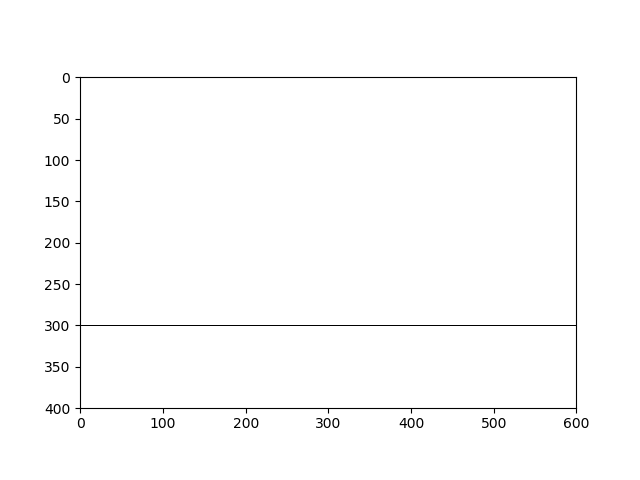

WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.


In [9]:
env = gym.make('CartPole-v0').unwrapped
observation = env.reset()

fig = plt.figure('Cart pole')
img = plt.imshow(env.render(mode='rgb_array'))
for _ in range(200):
    x = env.render(mode='rgb_array') # in rgb_array mode this returns a numpy array
    
    img.set_data(x) # this is a lot faster than calling imshow every time
    fig.canvas.draw()
    
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)